Homework 5 - Heather Turcios

# Exercise 7.1

### Question 1

In [1]:
#Import necessary packages
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
from shapely.geometry import mapping


#Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [2]:
#Set up data paths
ndvi_red_path = os.path.join("data", "2023-02-22-sentinel-2-red-band.tiff")
ndvi_nir_path = os.path.join("data", "2023-02-22-sentinel-2-NIR-band.tiff")

In [3]:
#Check Red Band Array
ndvi_red_xr = rxr.open_rasterio(ndvi_red_path, masked=True).squeeze()
ndvi_red_xr

<xarray.DataArray (y: 140, x: 159)>
[22260 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -118.4 -118.4 -118.4 ... -118.4 -118.4 -118.4
  * y            (y) float64 33.98 33.97 33.97 33.97 ... 33.96 33.96 33.96 33.96
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

In [4]:
#Check NIR band Array
ndvi_nir_xr = rxr.open_rasterio(ndvi_nir_path, masked=True).squeeze()
ndvi_nir_xr

<xarray.DataArray (y: 140, x: 159)>
[22260 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -118.4 -118.4 -118.4 ... -118.4 -118.4 -118.4
  * y            (y) float64 33.98 33.97 33.97 33.97 ... 33.96 33.96 33.96 33.96
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

We used the "Masked=True" to ensure that the "no data values" in our data sets don't plot anything that is assigned "nan" or "nodata".

In [5]:
#Checking to see if bounds & resolution are the same
print("Is the spatial extent (bounds) the same?",
      ndvi_red_xr.rio.bounds() == ndvi_nir_xr.rio.bounds())

print("Is the resolution the same?",
      ndvi_red_xr.rio.resolution() == ndvi_nir_xr.rio.resolution())

Is the spatial extent (bounds) the same? True
Is the resolution the same? True


The bounds and resolution are the same.

In [6]:
#View the Coordinate Reference System (CRS) 
print("The CRS for the red data is:", ndvi_red_xr.rio.crs)
print("The CRS for the nir data is:", ndvi_nir_xr.rio.crs)

The CRS for the red data is: EPSG:4326
The CRS for the nir data is: EPSG:4326


The CRS for both sets are the same.

### Question 2

In [7]:
#Calculate the NDVI
ndvi_xr = (ndvi_nir_xr - ndvi_red_xr) / (ndvi_nir_xr + ndvi_red_xr)

In [8]:
#Creating a path to put the new output
data_path = os.path.join("data")

if os.path.exists(data_path):
    print("The directory", data_path, "exists!")
else:
    os.makedirs(data_path)

The directory data exists!


In [9]:
#Make sure that your output data has a crs & no data value defined
print("The crs is", ndvi_xr.rio.crs)
print("The no data value is", ndvi_xr.rio.nodata)

The crs is EPSG:4326
The no data value is None


In [10]:
#Creating the new data set path
ndvi_data_path = os.path.join(data_path, "2023-02-22-sentinel-2-NDVI.tiff")
ndvi_data_path

'data/2023-02-22-sentinel-2-NDVI.tiff'

In [11]:
#Export data to geotiff
ndvi_xr.rio.to_raster(ndvi_data_path)

In [12]:
#Reopen the data
ndvi_data = rxr.open_rasterio(ndvi_data_path, masked=True).squeeze()
ndvi_data

<xarray.DataArray (y: 140, x: 159)>
[22260 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -118.4 -118.4 -118.4 ... -118.4 -118.4 -118.4
  * y            (y) float64 33.98 33.97 33.97 33.97 ... 33.96 33.96 33.96 33.96
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

### Question 3

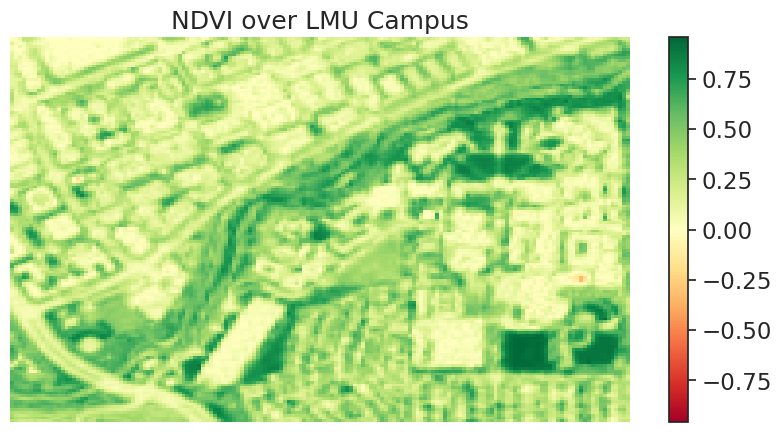

In [13]:
#Plot the data
f, ax = plt.subplots(figsize=(10, 5))
ndvi_data.plot(cmap="RdYlGn")
ax.set(title="NDVI over LMU Campus")
ax.set_axis_off()
plt.show()

A majority of the map is near zero, which makes sense since this area is urbanized and won't have much dense leaves to show. The darker green areas, which are closer to +1, shows more dense leaves which makes sense since the soccer and baseball fields show up in the lower right corner and the nature area below campus is full of plants and dense leaves as well also shows up as a darker green near +1. 

### Question 4

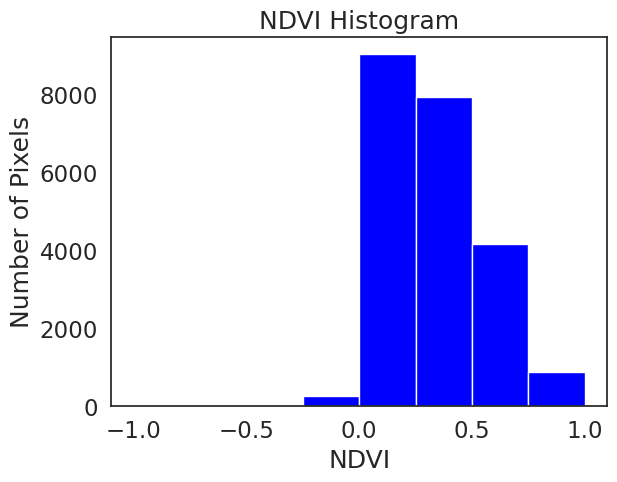

In [14]:
# Histogram with custom breaks
f, ax = plt.subplots()
ndvi_data.plot.hist(color="blue",
                        bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
ax.set(title="NDVI Histogram",
       xlabel="NDVI",
       ylabel="Number of Pixels")

plt.show()

The histogram makes sense since the area is mostly urbanized so the values should be closer to the zero value. There are also some very green and dense areas near LMU so it also makes sense that there a larger amount of pixels near the +1 value. 

In [15]:
#Printing the max and min values
ndvi_min_value = np.nanmin(ndvi_data)
ndvi_max_value = np.nanmax(ndvi_data)
print("The NDVI min value is", ndvi_min_value) 
print("The NDVI max value is", ndvi_max_value)

The NDVI min value is -0.3420191
The NDVI max value is 0.95758915


# Exercise 7.2

### Question 1

- <0: water 
- 0 to 0.2: urban/barren
- 0.2 to 0.5: low vegetation
- $\gt$ 0.5: high vegetation

In [21]:
#Classifying bins and using np.inf to make sure all values are included
class_groups = [-np.inf, 0, 0.2, 0.5, np.inf]
class_groups

[-inf, 0, 0.2, 0.5, inf]

In [22]:
#Check nodata value for your array
print(ndvi_data.rio.nodata)

None


In [23]:
ndvi_xr_class = xr.apply_ufunc(np.digitize,
                                     ndvi_data,
                                     class_groups)

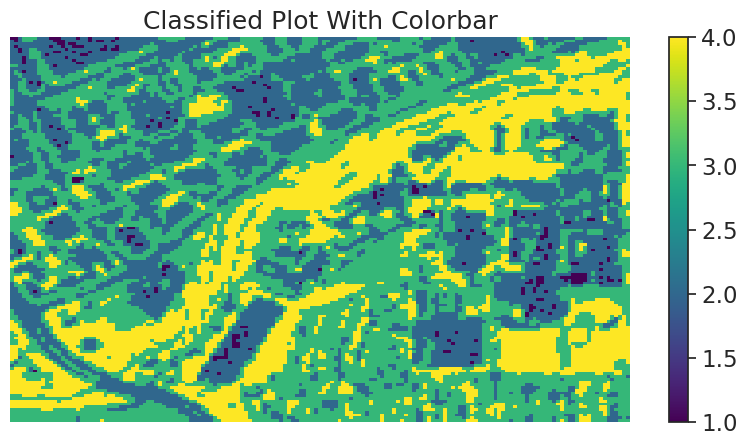

In [25]:
#Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10,5))
ndvi_xr_class.plot.imshow()
ax.set(title="Classified Plot With Colorbar")

ax.set_axis_off()
plt.show()

### Question 2

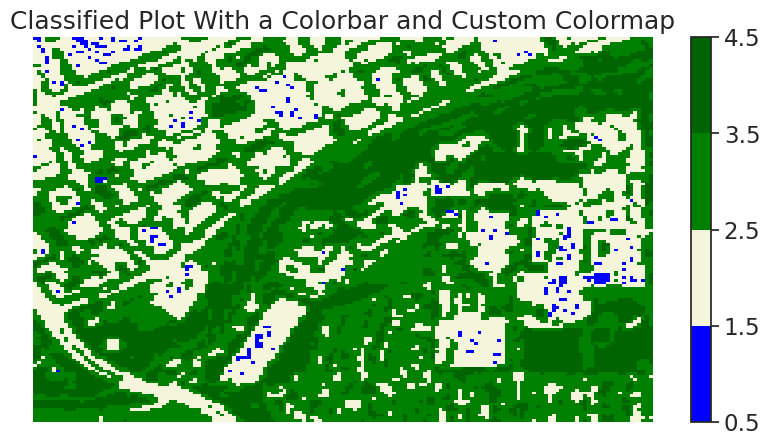

In [26]:
#Plot data using given bins and colors
colors = ['blue', 'beige', 'green', 'darkgreen']
class_bins = [0.5, 1.5, 2.5, 3.5, 4.5]
cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins, 
                    len(colors))

#Plot newly classified data
f, ax = plt.subplots(figsize=(10, 5))
ndvi_xr_class.plot.imshow(cmap=cmap,
                                   norm=norm)
ax.set(title="Classified Plot With a Colorbar and Custom Colormap")
ax.set_axis_off()
plt.show()

The darkest green color represents the values that are high in vegetation - which makes sense in this map since you can see the baseball and soccer fields clearly as well as the edge of the bluff. This classification does well in showing the urbanized areas where there are a lot of buildings and houses. The blue color is a bit confusing because it's not representing water areas so it can be a bit confusing.

### Question 3

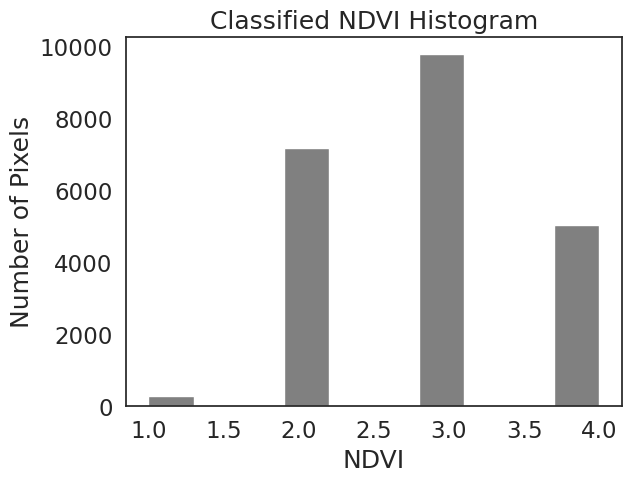

In [36]:
#Creating histogram of new classified data
f, ax = plt.subplots()
ndvi_xr_class.plot.hist(color="grey")
ax.set(title="Classified NDVI Histogram",
       xlabel="NDVI",
       ylabel="Number of Pixels")

plt.show()

Approximations of Percentages

- Water: ~0%
- Urban/Barren: ~40%
- Low Vegetation: ~45%
- High Vegetation: ~15%